### Nan Zhao

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults
from matplotlib import pyplot
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import *
from matplotlib import pyplot as plt

(1000, 3)


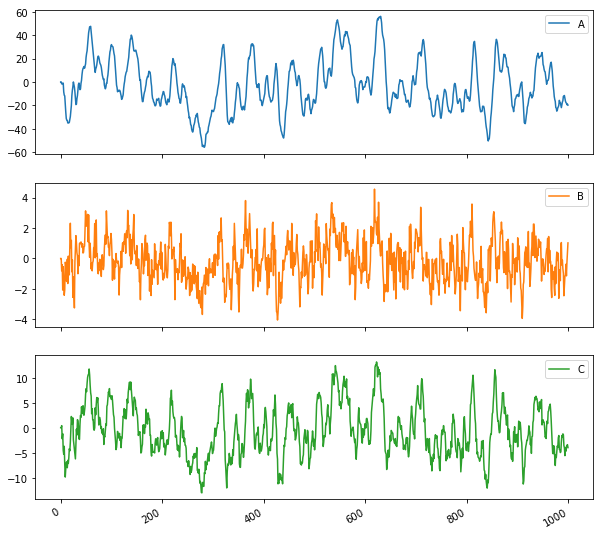

In [2]:
A=pd.read_csv('A.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
B=pd.read_csv('B.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
C=pd.read_csv('C.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

mdata=pd.concat([A,B,C],axis=1)
mdata.columns=['A','B','C']

data=mdata.dropna()
data.plot(subplots=True, layout=(3,1), figsize=(10,10))
print(data.shape)
pyplot.show()

### Determine optimum lag order (p) by either:
### Lag order selection

In [3]:
model=VAR(mdata)

#lag order selection
lag_order=model.select_order(20)
print()
print(lag_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        8.539       8.554       5111.       8.545
1       0.2995      0.3593       1.349      0.3222
2     0.03370*     0.1384*      1.034*    0.07354*
3      0.04409      0.1937       1.045      0.1010
4      0.05278      0.2473       1.054      0.1268
5      0.06347      0.3029       1.066      0.1545
6      0.07541      0.3597       1.078      0.1836
7      0.09175      0.4209       1.096      0.2170
8       0.1007      0.4747       1.106      0.2430
9       0.1051      0.5240       1.111      0.2644
10      0.1084      0.5722       1.115      0.2848
11      0.1196      0.6283       1.127      0.3131
12      0.1297      0.6833       1.139      0.3403
13      0.1322      0.7307       1.141      0.3599
14      0.1409      0.7842       1.151      0.3857
15      0.1474      0.8356       1.159      0.4092
16      0.1583      0.8914    

#### Perform model fits at different lag orders to find lowest AIC

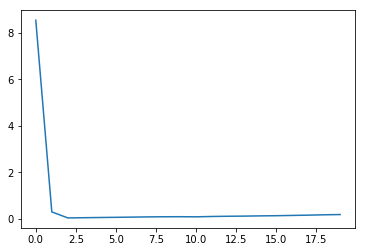

In [4]:
aic=[]
for i in range(0,20):
    results=model.fit(i)
    aic.append(results.aic)
pyplot.plot(range(0,20),aic)

The optimum lag order is found by actually running model.fit(p) with different values of p.  
The plot shows that the optimum lag order is 2. 

### Model fit at optimum lag order and get results

In [5]:
#fit the VAR model
results=model.fit(2)
print()
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, May, 2022
Time:                     16:00:44
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.150727
Nobs:                     998.000    HQIC:                 0.0867368
Log likelihood:          -4251.00    FPE:                    1.04865
AIC:                    0.0474994    Det(Omega_mle):         1.02689
--------------------------------------------------------------------
Results for equation A
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.021805         0.032702           -0.667           0.505
L1.A          0.506941         0.029924           16.941           0.000
L1.B          0.019381         0.032257            0.601           0.548
L1.C          1.036461

### Use results to find roots (number of roots = K*p)

In [6]:
# Finding roots to determine stationarity

#k=3,p=2
nroots=3*2

print()
print('Roots =')
for i in range(0,nroots):
    print(VARResults.roots(results)[i])
    
print()
print('Moduli =')
for i in range(0,nroots):
    print(np.absolute(VARResults.roots(results)[i]))


Roots =
(-5.038356099006575-0j)
(-2.759797539891226+0.9514553898601942j)
(-2.759797539891226-0.9514553898601942j)
(1.2951020335981098+0.24455937627668997j)
(1.2951020335981098-0.24455937627668997j)
(1.1440891999704335-0j)

Moduli =
5.038356099006575
2.9192036277182987
2.9192036277182987
1.317990351237369
1.317990351237369
1.1440891999704335


### Is the model stationary?
All are > 1 so stationary

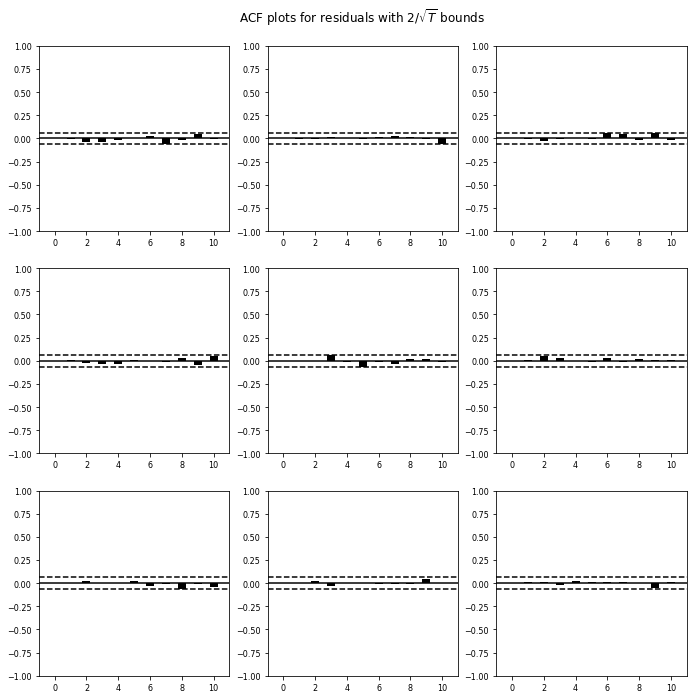

In [7]:
# plot the cross-correlations function

results.plot_acorr()
pyplot.show()

Cross-correlations of residuals are used to ensure there are no remaining significant correlations.  
They're all within the confidence interval so they're insignificant.

### Investigate Granger causality between series combinations (if any)

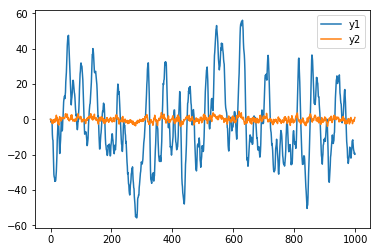


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=392.7695, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=393.9525, p=0.0000  , df=1
likelihood ratio test: chi2=332.0937, p=0.0000  , df=1
parameter F test:         F=392.7695, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=322.8985, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=649.0487, p=0.0000  , df=2
likelihood ratio test: chi2=499.9850, p=0.0000  , df=2
parameter F test:         F=322.8985, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=362.6217, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1095.5571, p=0.0000  , df=3
likelihood ratio test: chi2=739.1671, p=0.0000  , df=3
parameter F test:         F=362.6217, p=0.0000  , df_denom=990, df_num=3


{1: ({'lrtest': (332.0936640736454, 3.363479848093831e-74, 1),
   'params_ftest': (392.76945207218614, 6.0142896769342264e-74, 996.0, 1.0),
   'ssr_chi2test': (393.952492590476, 1.14136830852808e-87, 1),
   'ssr_ftest': (392.7694520721863, 6.0142896769337135e-74, 996.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (499.9850338019128, 2.689238950068241e-109, 2),
   'params_ftest': (322.89846460152796, 9.409555871100861e-109, 993.0, 2.0),
   'ssr_chi2test': (649.0486760771906, 1.1504579420229072e-141, 2),
   'ssr_ftest': (322.8984646015282, 9.409555871099256e-109, 993.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (739.1671438367075, 6.742048313468656e-160, 3),
   'params_ftest': (362.6217066196521, 7.564754388362669e-159, 990.0, 3.0),
   'ssr_chi2test': (1095.5570954539205, 3.34929082389205e-237, 3),
   'ssr_ftest': (362.6217066196527, 7.564754388360088e-159, 990.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1

In [8]:
# 1. B->A Success to reject the null hypothesis

y1=A
y2=B
pyplot.plot(y1, label='y1')
pyplot.plot(y2, label='y2')
pyplot.legend()
pyplot.show()

d={'col1': y1, 'col2':y2}
df=DataFrame(data=d)

# test whether the time series in the second column Granger causes the time seriies in the first time

from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df,3)

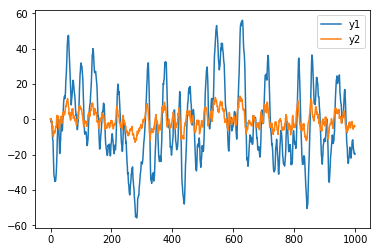


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10057.5224, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=10087.8161, p=0.0000  , df=1
likelihood ratio test: chi2=2404.3504, p=0.0000  , df=1
parameter F test:         F=10057.5224, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2195.0923, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=4412.2903, p=0.0000  , df=2
likelihood ratio test: chi2=1686.9242, p=0.0000  , df=2
parameter F test:         F=2195.0923, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1409.5274, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=4258.4812, p=0.0000  , df=3
likelihood ratio test: chi2=1657.2892, p=0.0000  , df=3
parameter F test:         F=1409.5274, p=0.0000  , df_denom=990, df_num=3


{1: ({'lrtest': (2404.3504107687413, 0.0, 1),
   'params_ftest': (10057.522401555503, 0.0, 996.0, 1.0),
   'ssr_chi2test': (10087.816143728865, 0.0, 1),
   'ssr_ftest': (10057.522401555505, 0.0, 996.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1686.9241504995698, 0.0, 2),
   'params_ftest': (2195.09233484733, 0.0, 993.0, 2.0),
   'ssr_chi2test': (4412.290332684062, 0.0, 2),
   'ssr_ftest': (2195.092334847331, 0.0, 993.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1657.2892491484672, 0.0, 3),
   'params_ftest': (1409.5273751602774, 0.0, 990.0, 3.0),
   'ssr_chi2test': (4258.481191014545, 0.0, 3),
   'ssr_ftest': (1409.5273751602806, 0.0, 990.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [9]:
# 2. C->A Success to reject the null hypothesis 

y1=A
y2=C
pyplot.plot(y1, label='y1')
pyplot.plot(y2, label='y2')
pyplot.legend()
pyplot.show()

d={'col1': y1, 'col2':y2}
df=DataFrame(data=d)

# test whether the time series in the second column Granger causes the time seriies in the first time

from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df,3)

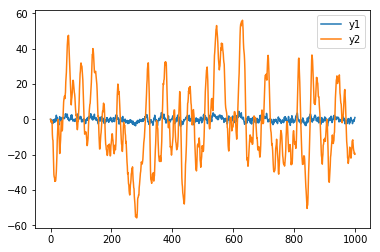


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0198  , p=0.0826  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=3.0289  , p=0.0818  , df=1
likelihood ratio test: chi2=3.0243  , p=0.0820  , df=1
parameter F test:         F=3.0198  , p=0.0826  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1399  , p=0.8694  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=0.2813  , p=0.8688  , df=2
likelihood ratio test: chi2=0.2812  , p=0.8688  , df=2
parameter F test:         F=0.1399  , p=0.8694  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4656  , p=0.2224  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=4.4277  , p=0.2188  , df=3
likelihood ratio test: chi2=4.4179  , p=0.2197  , df=3
parameter F test:         F=1.4656  , p=0.2224  , df_denom=990, df_num=3


{1: ({'lrtest': (3.0243239547589837, 0.08202449929611362, 1),
   'params_ftest': (3.019810608291916, 0.08256215465648095, 996.0, 1.0),
   'ssr_chi2test': (3.0289064233773972, 0.08179312771582256, 1),
   'ssr_ftest': (3.01981060829218, 0.08256215465646621, 996.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.28123573148741343, 0.8688212546342364, 2),
   'params_ftest': (0.1399330830170726, 0.8694335534094016, 993.0, 2.0),
   'ssr_chi2test': (0.28127536123063923, 0.8688040392231824, 2),
   'ssr_ftest': (0.1399330830170465, 0.8694335534094016, 993.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (4.417943372472109, 0.21972737592450597, 3),
   'params_ftest': (1.4655529457939256, 0.22239460858463453, 990.0, 3.0),
   'ssr_chi2test': (4.427746324110696, 0.218826407775111, 3),
   'ssr_ftest': (1.4655529457939114, 0.22239460858463453, 990.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

In [10]:
# 3. A->B Fail to reject the null hypothesis at order 1
y1=B
y2=A
pyplot.plot(y1, label='y1')
pyplot.plot(y2, label='y2')
pyplot.legend()
pyplot.show()

d={'col1': y1, 'col2':y2}
df=DataFrame(data=d)

# test whether the time series in the second column Granger causes the time seriies in the first time

from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df,3)

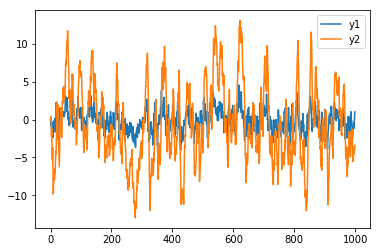


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.3795 , p=0.0001  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=16.4288 , p=0.0001  , df=1
likelihood ratio test: chi2=16.2952 , p=0.0001  , df=1
parameter F test:         F=16.3795 , p=0.0001  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1996  , p=0.3018  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=2.4112  , p=0.2995  , df=2
likelihood ratio test: chi2=2.4083  , p=0.2999  , df=2
parameter F test:         F=1.1996  , p=0.3018  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0361  , p=0.3757  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=3.1304  , p=0.3720  , df=3
likelihood ratio test: chi2=3.1255  , p=0.3727  , df=3
parameter F test:         F=1.0361  , p=0.3757  , df_denom=990, df_num=3


{1: ({'lrtest': (16.29519147434985, 5.4201318493818766e-05, 1),
   'params_ftest': (16.379480774348483, 5.585892324377517e-05, 996.0, 1.0),
   'ssr_chi2test': (16.42881655981324, 5.051148016288229e-05, 1),
   'ssr_ftest': (16.379480774348334, 5.585892324378182e-05, 996.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (2.408312877319986, 0.2999449147577086, 2),
   'params_ftest': (1.1995703737750376, 0.3017599060819696, 993.0, 2.0),
   'ssr_chi2test': (2.4112210131470726, 0.29950909141648613, 2),
   'ssr_ftest': (1.1995703737750716, 0.3017599060819416, 993.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (3.1254588429983414, 0.3726834513052497, 3),
   'params_ftest': (1.0361281445703832, 0.37570577424909535, 990.0, 3.0),
   'ssr_chi2test': (3.1303629095049468, 0.3719592214673675, 3),
   'ssr_ftest': (1.0361281445703436, 0.3757057742491057, 990.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

In [11]:
# 4. C->B Fail to reject the null hypothesis at order 2

y1=B
y2=C
pyplot.plot(y1, label='y1')
pyplot.plot(y2, label='y2')
pyplot.legend()
pyplot.show()

d={'col1': y1, 'col2':y2}
df=DataFrame(data=d)

# test whether the time series in the second column Granger causes the time seriies in the first time

from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df,3)

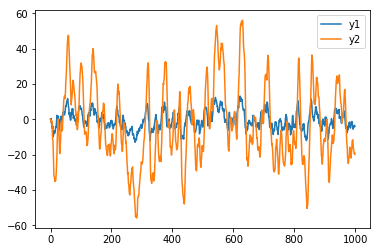


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=51.5885 , p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=51.7439 , p=0.0000  , df=1
likelihood ratio test: chi2=50.4484 , p=0.0000  , df=1
parameter F test:         F=51.5885 , p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.3064 , p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=30.7669 , p=0.0000  , df=2
likelihood ratio test: chi2=30.3021 , p=0.0000  , df=2
parameter F test:         F=15.3064 , p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4617  , p=0.7091  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1.3948  , p=0.7067  , df=3
likelihood ratio test: chi2=1.3939  , p=0.7070  , df=3
parameter F test:         F=0.4617  , p=0.7091  , df_denom=990, df_num=3


{1: ({'lrtest': (50.44839192252448, 1.2234000932019075e-12, 1),
   'params_ftest': (51.588513929732486, 1.3386221290204217e-12, 996.0, 1.0),
   'ssr_chi2test': (51.7439010198821, 6.323294244431729e-13, 1),
   'ssr_ftest': (51.58851392973231, 1.3386221290205073e-12, 996.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (30.302143814707506, 2.6301049322944197e-07, 2),
   'params_ftest': (15.306361362108362, 2.837521379738283e-07, 993.0, 2.0),
   'ssr_chi2test': (30.766865336120805, 2.0847792678292374e-07, 2),
   'ssr_ftest': (15.306361362108195, 2.837521379738772e-07, 993.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.3938656583204647, 0.7069732830532804, 3),
   'params_ftest': (0.4616824010973258, 0.7091067248561732, 990.0, 3.0),
   'ssr_chi2test': (1.3948404663453589, 0.7067445991404265, 3),
   'ssr_ftest': (0.4616824010972603, 0.7091067248561991, 990.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.]

In [12]:
# 5. A->C Fail to reject the null hypothesis at order 3

y1=C
y2=A

pyplot.plot(y1, label='y1')
pyplot.plot(y2, label='y2')
pyplot.legend()
pyplot.show()

d={'col1': y1, 'col2':y2}
df=DataFrame(data=d)

# test whether the time series in the second column Granger causes the time seriies in the first time

from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df,3)

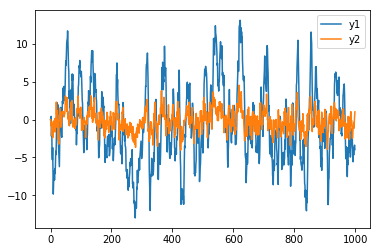


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1396.3028, p=0.0000  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=1400.5085, p=0.0000  , df=1
likelihood ratio test: chi2=875.3882, p=0.0000  , df=1
parameter F test:         F=1396.3028, p=0.0000  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=830.6571, p=0.0000  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=1669.6793, p=0.0000  , df=2
likelihood ratio test: chi2=981.2445, p=0.0000  , df=2
parameter F test:         F=830.6571, p=0.0000  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=511.7365, p=0.0000  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=1546.0646, p=0.0000  , df=3
likelihood ratio test: chi2=933.5653, p=0.0000  , df=3
parameter F test:         F=511.7365, p=0.0000  , df_denom=990, df_num=3


{1: ({'lrtest': (875.3881613438757, 2.1989786962280618e-192, 1),
   'params_ftest': (1396.3027704948292, 1.0046643851214069e-191, 996.0, 1.0),
   'ssr_chi2test': (1400.5085017312597, 1.6290355442594538e-306, 1),
   'ssr_ftest': (1396.3027704948295, 1.0046643851214069e-191, 996.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (981.2444830820396, 8.423019376061999e-214, 2),
   'params_ftest': (830.6570651119661, 9.839555417965239e-213, 993.0, 2.0),
   'ssr_chi2test': (1669.6792567608168, 0.0, 2),
   'ssr_ftest': (830.6570651119696, 9.839555417951815e-213, 993.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (933.5652682501868, 4.6382548836016735e-202, 3),
   'params_ftest': (511.7365218754267, 9.874137585583755e-201, 990.0, 3.0),
   'ssr_chi2test': (1546.0645827569738, 0.0, 3),
   'ssr_ftest': (511.7365218754276, 9.874137585578142e-201, 990.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [13]:
# 6. B->C Success to reject the null hypothesis

y1=C
y2=B
pyplot.plot(y1, label='y1')
pyplot.plot(y2, label='y2')
pyplot.legend()
pyplot.show()

d={'col1': y1, 'col2':y2}
df=DataFrame(data=d)

# test whether the time series in the second column Granger causes the time seriies in the first time

from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df,3)

### Use IRF plots to confirm your causality conclusions

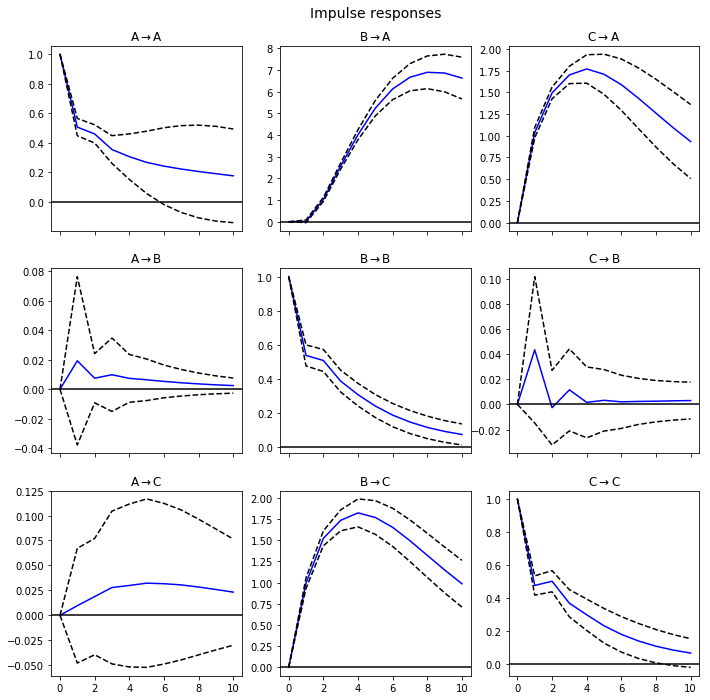

In [14]:
# impulse response analysis

irf=results.irf(10)
irf.plot(orth=False)
pyplot.show()

### Investigate Granger causality between series combinations (if any)
1. B->A Success to reject the null hypothesis
2. C->A Success to reject the null hypothesis
3. A->B Fail to reject the null hypothesis at order 1
4. C->B Fail to reject the null hypothesis at order 2
5. A->C Fail to reject the null hypothesis at order 3
6. B->C Success to reject the null hypothesis

### impulse response analysis

The zero line lies within the 95% confidence interval
(Fail to reject the null hypothesis, H0: variable response = 0)

1. B->A Success to reject the null hypothesis
2. C->A Success to reject the null hypothesis
3. A->B Fail to reject the null hypothesis
4. C->B Fail to reject the null hypothesis
5. A->C Fail to reject the null hypothesis
6. B->C Success to reject the null hypothesis

### Conclusion

1. B->A Success to reject the null hypothesis
2. C->A Success to reject the null hypothesis
3. A->B Fail to reject the null hypothesis
4. C->B Fail to reject the null hypothesis
5. A->C Fail to reject the null hypothesis
6. B->C Success to reject the null hypothesis

B G-causes A enabled  
C G-causes A enabled  
B G-causes C enabled  

### Order the variables (list series in decreasing order of exogeneity)
Cholesky Ordering  
1.B  
2.C  
3.A  




### Whether VAR or VECM model, perform a dynamic forecast 10 steps forward and plot


Lag order =  2

Forecastedd values:
[[-19.41046407   0.50396357  -1.36313418]
 [-16.99429195   0.50303366  -0.44339713]
 [-13.49968944   0.31950147   0.32408226]
 [-10.03313159   0.22867534   0.72000573]
 [ -6.82304793   0.13492258   0.8926809 ]]


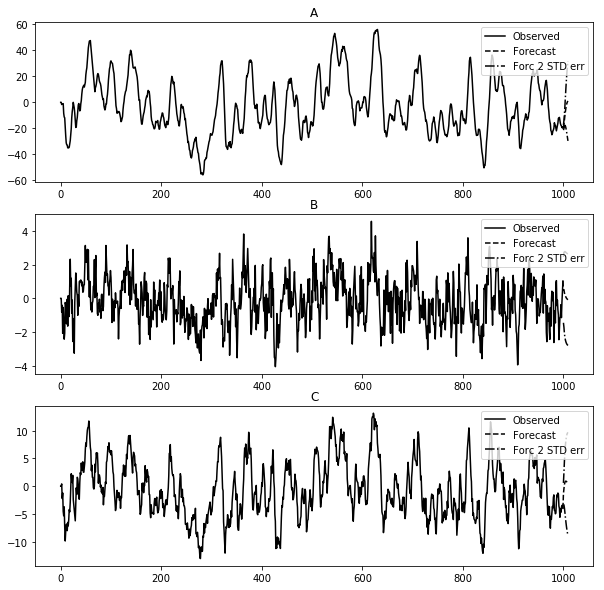

In [15]:
# VAR Forecasting
lag_order=results.k_ar

print()
print("Lag order = ", lag_order)
forecast_values = results.forecast(data.values[-lag_order:], 5)
print()
print('Forecastedd values:')
print(forecast_values)
#plot the forecast results
results.plot_forecast(10)
pyplot.show()

/Users/nan/opt/anaconda3/envs/statsmodel/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/nan/opt/anaconda3/envs/statsmodel/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/nan/opt/anaconda3/e

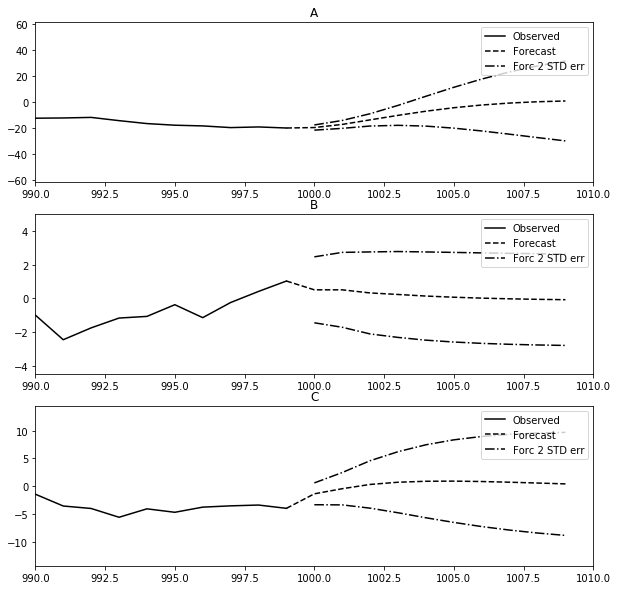

In [16]:
# Plotting the forecast from the last 20 observations
results.plot_forecast(10)
plt1 = pyplot.subplot(311)
plt1.set_xlim(990,1010)

plt2=pyplot.subplot(312)
plt2.set_xlim(990,1010)

plt3=pyplot.subplot(313)
plt3.set_xlim(990,1010)
pyplot.show()

# Problem 2

data.shape = (1000, 3)


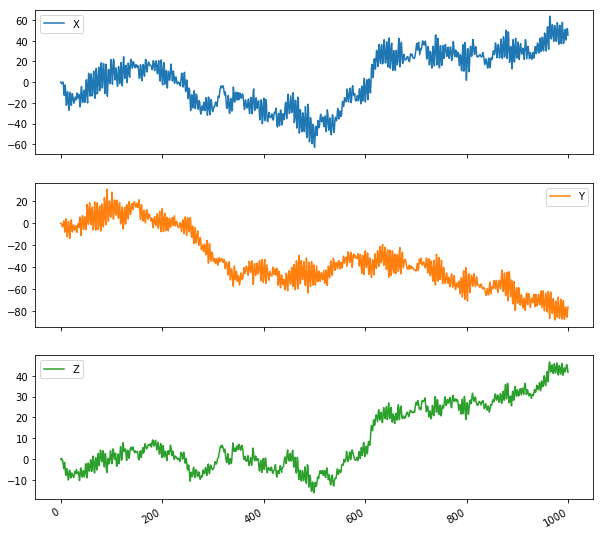

In [17]:
X=pd.read_csv('X.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
Y=pd.read_csv('Y.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
Z=pd.read_csv('Z.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

mdata=pd.concat([X,Y,Z],axis=1)
mdata.columns=['X','Y','Z']
data=mdata.dropna()
data.plot(subplots=True, layout=(3,1), figsize=(10,10))
print('data.shape =',data.shape)
pyplot.show()

### Determine optimum lag order (p) by either:
### Lag order selection

In [18]:
model=VAR(data)

#lag order selection
lag_order=model.select_order(20)
print()
print(lag_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        15.65       15.67   6.278e+06       15.66
1        3.533       3.593       34.22       3.555
2     0.02787*     0.1326*      1.028*    0.06771*
3      0.03866      0.1883       1.039     0.09558
4      0.04930      0.2438       1.051      0.1233
5      0.05873      0.2981       1.060      0.1498
6      0.07043      0.3547       1.073      0.1786
7      0.08137      0.4105       1.085      0.2066
8      0.09675      0.4708       1.102      0.2390
9       0.1071      0.5261       1.113      0.2665
10      0.1076      0.5715       1.114      0.2841
11      0.1178      0.6265       1.125      0.3113
12      0.1287      0.6823       1.137      0.3393
13      0.1360      0.7344       1.146      0.3636
14      0.1453      0.7886       1.157      0.3900
15      0.1467      0.8349       1.158      0.4085
16      0.1557      0.8889    

### Perform model fits at different lag orders to find lowest AIC

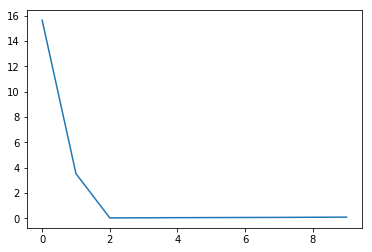

In [19]:
aic=[]
for i in range(0,10):
    results=model.fit(i)
    aic.append(results.aic)
pyplot.plot(range(0,10),aic)

The optimum lag order is found by actually running model.fit(p) with different values of p.  
The plot shows that the optimum lag order is 2. 
### Model fit at optimum lag order and get results

In [20]:
#fit the VAR model
results=model.fit(2)
print()
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, May, 2022
Time:                     16:00:50
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.143403
Nobs:                     998.000    HQIC:                 0.0794136
Log likelihood:          -4247.35    FPE:                    1.04099
AIC:                    0.0401762    Det(Omega_mle):         1.01939
--------------------------------------------------------------------
Results for equation X
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.068742         0.053248           -1.291           0.197
L1.X          0.703151         0.008206           85.692           0.000
L1.Y          0.224385         0.029645            7.569           0.000
L1.Z          2.023227

### Use results to find roots (number of roots = K*p)

In [21]:
# Finding roots to determine stationarity
from statsmodels.tsa.vector_ar.var_model import VARResults

#k=3,p=2
nroots=3*2

print()
print('Roots =')
for i in range(0,nroots):
    print(VARResults.roots(results)[i])
    
print()
print('Moduli =')
for i in range(0,nroots):
    print(np.absolute(VARResults.roots(results)[i]))


Roots =
(21.58429119204003-0j)
(2.295827787826804-0j)
(0.28859758189183665+0.988626282462037j)
(0.28859758189183665-0.988626282462037j)
(1.0042965693899328-0j)
(0.9993052689463221-0j)

Moduli =
21.58429119204003
2.295827787826804
1.0298885816672223
1.0298885816672223
1.0042965693899328
0.9993052689463221


### Is the model stationary?
Not all > 1 so not stationary.
### Is the model cointegrated?
Yes  
If the set of series can be made stationary with the same order of differencing, and some linear combination of these series is stationary with a lower order of differencing (including and especially no differencing) then the series are said to be “cointegrated”.

### Perform a Johansen cointegration test. What is the cointegration rank?

In [22]:
model =VECM(data)

#lag order selection
lag_order=select_order(data=data, maxlags=15)
print()
print(lag_order.summary())
print()
print('AIC lag order =', lag_order.aic)
print()


 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.534       3.593       34.25       3.556
1     0.02397*     0.1284*      1.024*    0.06368*
2      0.03512      0.1843       1.036     0.09185
3      0.04556      0.2394       1.047      0.1193
4      0.05483      0.2934       1.056      0.1456
5      0.06650      0.3499       1.069      0.1743
6      0.07750      0.4056       1.081      0.2023
7      0.09266      0.4655       1.097      0.2345
8       0.1030      0.5206       1.109      0.2619
9       0.1032      0.5655       1.109      0.2790
10      0.1136      0.6207       1.120      0.3065
11      0.1250      0.6768       1.133      0.3349
12      0.1324      0.7289       1.142      0.3593
13      0.1417      0.7830       1.152      0.3857
14      0.1430      0.8290       1.154      0.4040
15      0.1519      0.8827       1.164      0.4299
------------------------------

In [23]:
# Cointegration rank

rank_test = select_coint_rank(data, 0, 1, method='trace', signif=0.05)
print(rank_test)
print()
print('Rank =', rank_test.rank)
print()

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          792.0          29.80
  1   3          2.626          15.49
-------------------------------------

Rank = 1



### Create a VECM model (with no deterministic terms) and fit

In [24]:
# Parameter estimation

model = VECM(data, 
             k_ar_diff=lag_order.aic, # =1
             coint_rank=rank_test.rank) # =1

vecm_res = model.fit()
print(vecm_res.summary())
print()

Det. terms outside the coint. relation & lagged endog. parameters for equation X
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.X           0.5314      0.027     19.648      0.000       0.478       0.584
L1.Y          -0.1870      0.017    -10.934      0.000      -0.221      -0.153
L1.Z           0.3653      0.077      4.770      0.000       0.215       0.515
Det. terms outside the coint. relation & lagged endog. parameters for equation Y
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.X           0.3405      0.026     12.921      0.000       0.289       0.392
L1.Y           0.2365      0.017     14.189      0.000       0.204       0.269
L1.Z          -0.4886      0.075     -6.549      0.000      -0.635      -0.342
Det. terms outside the coint. relation & lagged 

### What are the Alpha and Beta matrices?

In [25]:
print('Alpha =')
print(vecm_res.alpha)
print('Beta =')
print(vecm_res.beta)

Alpha =
[[-0.82806147]
 [ 0.5785917 ]
 [-0.23581454]]
Beta =
[[ 1.        ]
 [-0.49952405]
 [-2.000714  ]]


### Whether VAR or VECM model, perform a dynamic forecast 10 steps forward and plot

forecast:
[[ 39.9615332  -75.91121098  42.34857073]
 [ 43.03161751 -81.9876221   44.03728966]
 [ 49.82762548 -85.58794554  44.17523802]
 [ 50.68590667 -81.76329636  42.66632223]
 [ 44.77012499 -76.26196758  41.71947122]
 [ 40.75179263 -76.86209831  42.62853177]
 [ 44.14602263 -82.36972802  44.01667208]
 [ 49.78311419 -84.79921301  43.91554146]
 [ 49.65210257 -80.92856338  42.55210138]
 [ 44.26723384 -76.53147879  41.90549567]]
lower:
[[ 37.96980134 -77.85185489  40.39218427]
 [ 38.36234913 -86.51303216  40.64579255]
 [ 41.34366227 -91.87507871  40.0431094 ]
 [ 40.42125975 -88.56669744  38.30630215]
 [ 34.18729479 -83.87448647  37.16034941]
 [ 29.89662797 -85.04086426  37.57460791]
 [ 32.2951925  -91.51033795  38.2780227 ]
 [ 36.09390034 -94.72744604  37.75966247]
 [ 34.99222973 -91.19073035  36.23662872]
 [ 29.38816114 -87.28306462  35.4192846 ]]
upper:
[[ 41.95326505 -73.97056707  44.30495719]
 [ 47.7008859  -77.46221204  47.42878678]
 [ 58.31158868 -79.30081237  48.30736664]
 [ 60.95

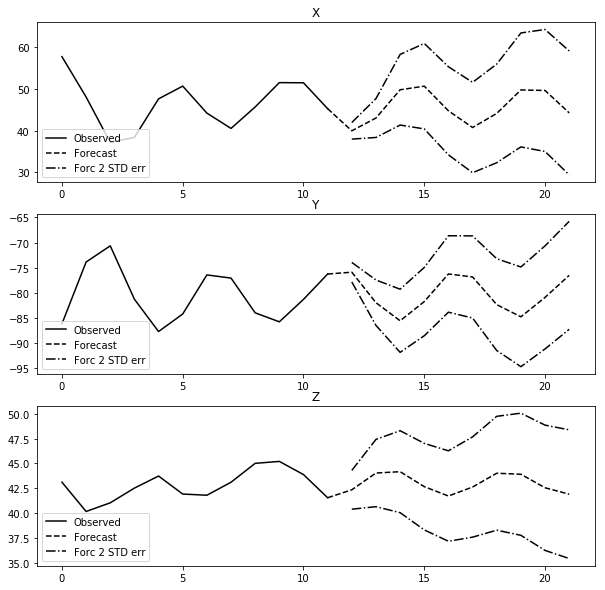

In [26]:
# Forcasting

vecm_res.predict(steps=10, alpha=0.05)
for text, values in zip(('forecast', 'lower', 'upper'),
                        vecm_res.predict(steps=10, alpha=0.05)):
    print(text + ":", values, sep='\n')

vecm_res.plot_forecast(steps=10, n_last_obs=12)
plt.show()